In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import adjusted_rand_score, silhouette_score, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
# load hyperspectral image
hyper_spectral_array = np.load('indian_pines_corrected.npy')



In [ ]:
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

labels = np.load("indian_pines_gt.npy")

for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        label = labels[i, j]
        category = classes[label]
        print(f"Pixel ({i}, {j}): Label {label} - Category: {category}")



Pixel (0, 0): Label 3 - Category: Corn-mintill
Pixel (0, 1): Label 3 - Category: Corn-mintill
Pixel (0, 2): Label 3 - Category: Corn-mintill
Pixel (0, 3): Label 3 - Category: Corn-mintill
Pixel (0, 4): Label 3 - Category: Corn-mintill
Pixel (0, 5): Label 3 - Category: Corn-mintill
Pixel (0, 6): Label 3 - Category: Corn-mintill
Pixel (0, 7): Label 3 - Category: Corn-mintill
Pixel (0, 8): Label 3 - Category: Corn-mintill
Pixel (0, 9): Label 3 - Category: Corn-mintill
Pixel (0, 10): Label 3 - Category: Corn-mintill
Pixel (0, 11): Label 3 - Category: Corn-mintill
Pixel (0, 12): Label 3 - Category: Corn-mintill
Pixel (0, 13): Label 3 - Category: Corn-mintill
Pixel (0, 14): Label 3 - Category: Corn-mintill
Pixel (0, 15): Label 3 - Category: Corn-mintill
Pixel (0, 16): Label 3 - Category: Corn-mintill
Pixel (0, 17): Label 3 - Category: Corn-mintill
Pixel (0, 18): Label 3 - Category: Corn-mintill
Pixel (0, 19): Label 3 - Category: Corn-mintill
Pixel (0, 20): Label 0 - Category: Undefined
Pixel

In [ ]:
#2a. 
height, width, num_channels = hyper_spectral_array.shape

print(f"Height: {height}")
print(f"Width: {width}")
print(f"Number of Hyperspectral Channels: {num_channels}")



Height: 145
Width: 145
Number of Hyperspectral Channels: 200


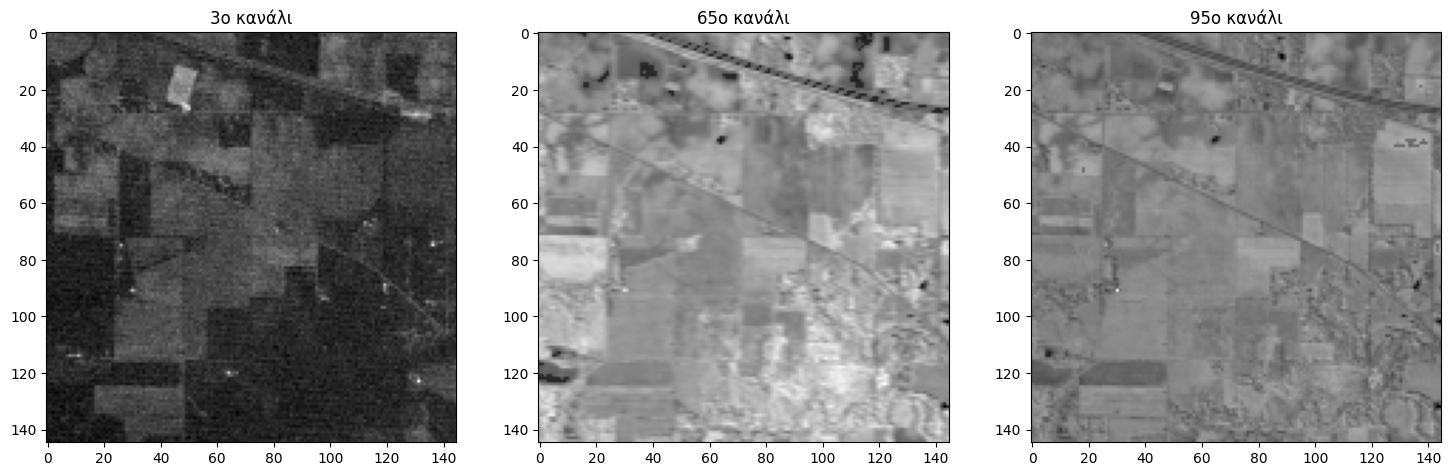

In [ ]:
#2b channels

# Channels
channel_3 = hyper_spectral_array[:, :, 2]
channel_65 = hyper_spectral_array[:, :, 64]
channel_95 = hyper_spectral_array[:, :, 94]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Ploting channels
axes[0].imshow(channel_3, cmap='gray')
axes[0].set_title('3ο κανάλι')

axes[1].imshow(channel_65, cmap='gray')
axes[1].set_title('65ο κανάλι')

axes[2].imshow(channel_95, cmap='gray')
axes[2].set_title('95ο κανάλι')

plt.show()


In [ ]:
#2c.
unique_labels = np.unique(labels)

num_categories = len(unique_labels)
print(f"Συνολικός αριθμός διαφορετικών κατηγοριών: {num_categories}")

print("\nΟνόματα Κατηγοριών:")
for label in unique_labels:
    print(f"Κατηγορία {label}: {classes[label]}")

Συνολικός αριθμός διαφορετικών κατηγοριών: 17

Ονόματα Κατηγοριών:
Κατηγορία 0: Undefined
Κατηγορία 1: Alfalfa
Κατηγορία 2: Corn-notill
Κατηγορία 3: Corn-mintill
Κατηγορία 4: Corn
Κατηγορία 5: Grass-pasture
Κατηγορία 6: Grass-trees
Κατηγορία 7: Grass-pasture-mowed
Κατηγορία 8: Hay-windrowed
Κατηγορία 9: Oats
Κατηγορία 10: Soybean-notill
Κατηγορία 11: Soybean-mintill
Κατηγορία 12: Soybean-clean
Κατηγορία 13: Wheat
Κατηγορία 14: Woods
Κατηγορία 15: Buildings-Grass-Trees-Drives
Κατηγορία 16: Stone-Steel-Towers


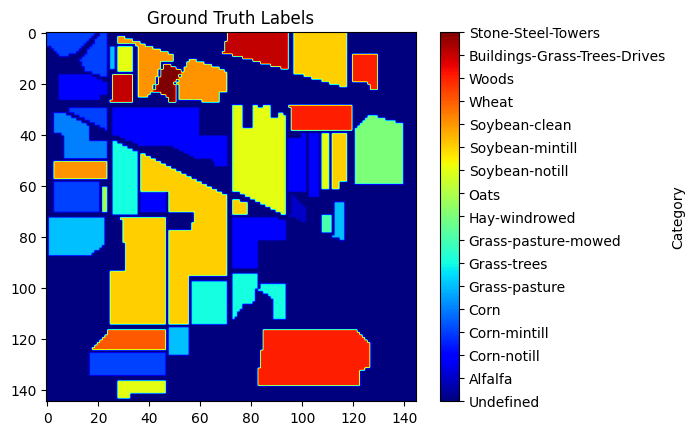

In [49]:
#2d.

plt.imshow(labels, cmap='jet')
plt.title('Ground Truth Labels')
cbar = plt.colorbar(label='Category')
cbar.set_ticks(np.arange(0, len(classes), 1))
cbar.set_ticklabels(classes)

plt.show()

In [ ]:
#2e.

# count pixels for every category
class_counts = {class_name: np.sum(labels == i) for i, class_name in enumerate(classes)}

for class_name, count in class_counts.items():
    print(f"{class_name}: {count} pixels")

Undefined: 10776 pixels
Alfalfa: 46 pixels
Corn-notill: 1428 pixels
Corn-mintill: 830 pixels
Corn: 237 pixels
Grass-pasture: 483 pixels
Grass-trees: 730 pixels
Grass-pasture-mowed: 28 pixels
Hay-windrowed: 478 pixels
Oats: 20 pixels
Soybean-notill: 972 pixels
Soybean-mintill: 2455 pixels
Soybean-clean: 593 pixels
Wheat: 205 pixels
Woods: 1265 pixels
Buildings-Grass-Trees-Drives: 386 pixels
Stone-Steel-Towers: 93 pixels


In [ ]:
#3.a

num_pixels = height * width

# reshape image N(pixels) x K (no.channels)
hyper_spectral_reshaped = hyper_spectral_array.reshape((hyper_spectral_array.shape[0] * hyper_spectral_array.shape[1]), hyper_spectral_array.shape[2])

labels_reshaped = labels.reshape(num_pixels)
print(len(labels_reshaped))

# print valid labels
valid_indices = np.where(labels_reshaped != 0)
hyper_spectral_valid = hyper_spectral_reshaped[valid_indices]
labels_valid = labels_reshaped[valid_indices]
print(len(labels_valid))



21025
10249


In [ ]:
#3.b
unique_classes = np.unique(labels_valid)
random_pixels = {}
for class_id in unique_classes:
    class_name = classes[class_id]

    
    indices = np.where(labels_valid == class_id)

    if len(indices[0]) > 0:
        random_index = np.random.choice(len(indices[0]))
        pixel_position = indices[0][random_index]
        random_pixel_value = hyper_spectral_valid[pixel_position]

        random_pixels[class_name] = {
            "Pixel Position": pixel_position,
            "Pixel Value": random_pixel_value
        }

for class_name, data in random_pixels.items():
    print(f"{class_name}:")
    print(f"  θέση pixel: {data['Pixel Position']}")
    print(f"  Τιμές pixel: {data['Pixel Value']}")
    print()

Alfalfa:
  θέση pixel: 5851
  Τιμές pixel: [2775 3865 4204 4100 4342 4742 4754 4624 4503 4338 4302 4220 4186 4354
 4438 4321 4298 4104 3926 3832 3798 3757 3654 2808 2770 2600 3265 3237
 3202 3088 2795 3060 2792 4326 4544 4675 5332 5754 5788 4020 5973 6065
 5843 5759 5419 4973 5365 5822 5737 5781 5752 5846 5732 4737 4539 4420
 4025 2441 2610 2866 3733 4384 4927 5251 5157 5181 5103 5107 5077 4996
 4874 4786 4687 4526 3968 3214 1907 1695 2028 1901 2505 3189 2564 3309
 2646 2606 2695 2779 3683 3643 2746 3107 3213 2620 3116 2563 2579 3110
 2780 2524 2005 1661 1106 1055 1063 1093 1112 1215 1292 1220 1325 1526
 1736 1884 2001 2054 2096 2111 2104 1999 2004 2056 2014 2028 2080 2076
 2036 2014 2007 1966 1932 1896 1838 1792 1747 1690 1642 1605 1562 1477
 1360 1249 1124 1034 1029 1020 1049 1134 1198 1158 1069 1074 1143 1220
 1213 1159 1168 1198 1232 1237 1243 1237 1240 1238 1237 1229 1217 1217
 1221 1215 1220 1228 1229 1209 1203 1172 1168 1150 1158 1142 1128 1130
 1118 1124 1104 1095 1094 1078 107

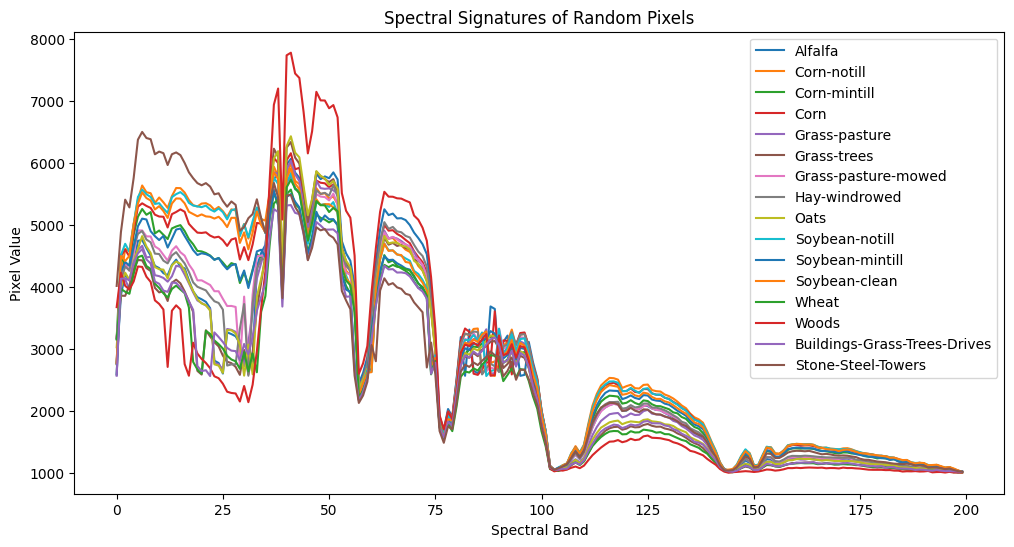

In [ ]:
#3.c
plt.figure(figsize=(12, 6))

for class_name, data in random_pixels.items():
    plt.plot(data['Pixel Value'], label=class_name)

plt.title('Spectral Signatures of Random Pixels')
plt.xlabel('Spectral Band')
plt.ylabel('Pixel Value')
plt.legend()
plt.show()



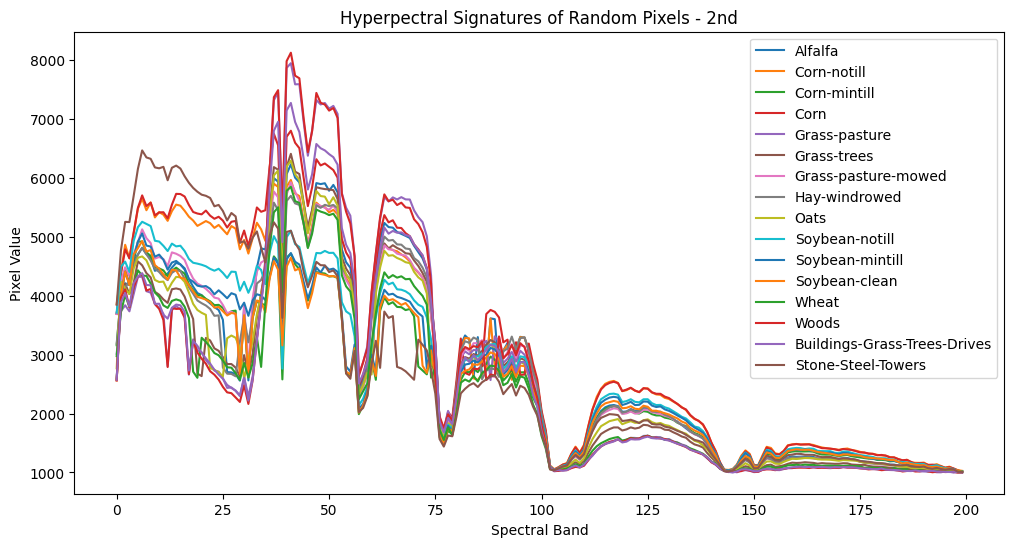

In [ ]:
unique_classes = np.unique(labels_valid)
random_pixels1 = {}
for class_id in unique_classes:
    class_name = classes[class_id]

  
    indices = np.where(labels_valid == class_id)

    if len(indices[0]) > 0:
        random_index = np.random.choice(len(indices[0]))
        pixel_position = indices[0][random_index]
        random_pixel_value = hyper_spectral_valid[pixel_position]

        random_pixels1[class_name] = {
            "Pixel Position": pixel_position,
            "Pixel Value": random_pixel_value
        }

plt.figure(figsize=(12, 6))
for class_name, data in random_pixels1.items():
    plt.plot(data['Pixel Value'], label=class_name)


plt.title('Hyperpectral Signatures of Random Pixels - 2nd')
plt.xlabel('Spectral Band')
plt.ylabel('Pixel Value')
plt.legend()
plt.show()

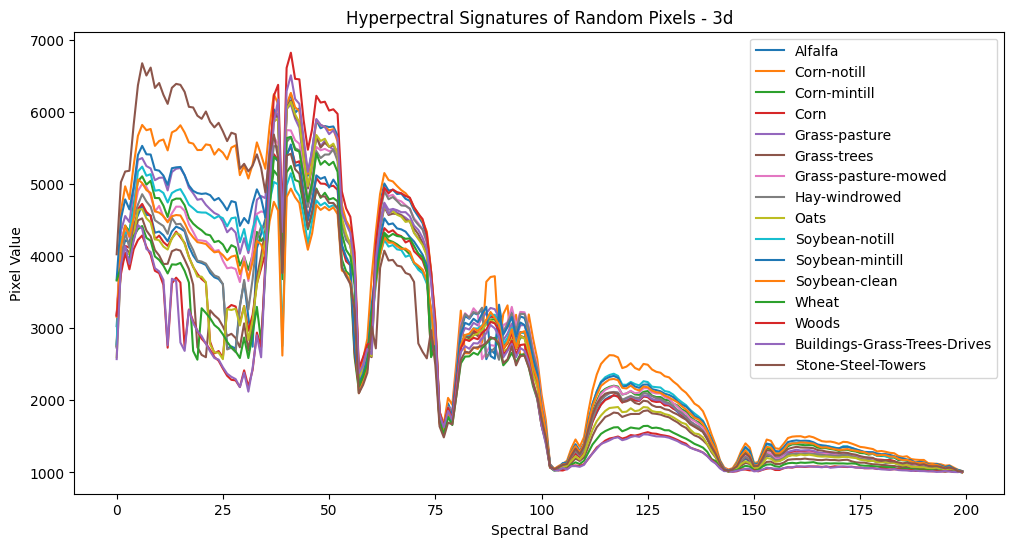

In [ ]:
unique_classes = np.unique(labels_valid)
random_pixels2 = {}
for class_id in unique_classes:
    class_name = classes[class_id]

    indices = np.where(labels_valid == class_id)

    if len(indices[0]) > 0:
        random_index = np.random.choice(len(indices[0]))
        pixel_position = indices[0][random_index]
        random_pixel_value = hyper_spectral_valid[pixel_position]

        random_pixels2[class_name] = {
            "Pixel Position": pixel_position,
            "Pixel Value": random_pixel_value
        }

plt.figure(figsize=(12, 6))
for class_name, data in random_pixels2.items():
    plt.plot(data['Pixel Value'], label=class_name)


plt.title('Hyperpectral Signatures of Random Pixels - 3d')
plt.xlabel('Spectral Band')
plt.ylabel('Pixel Value')
plt.legend()
plt.show()

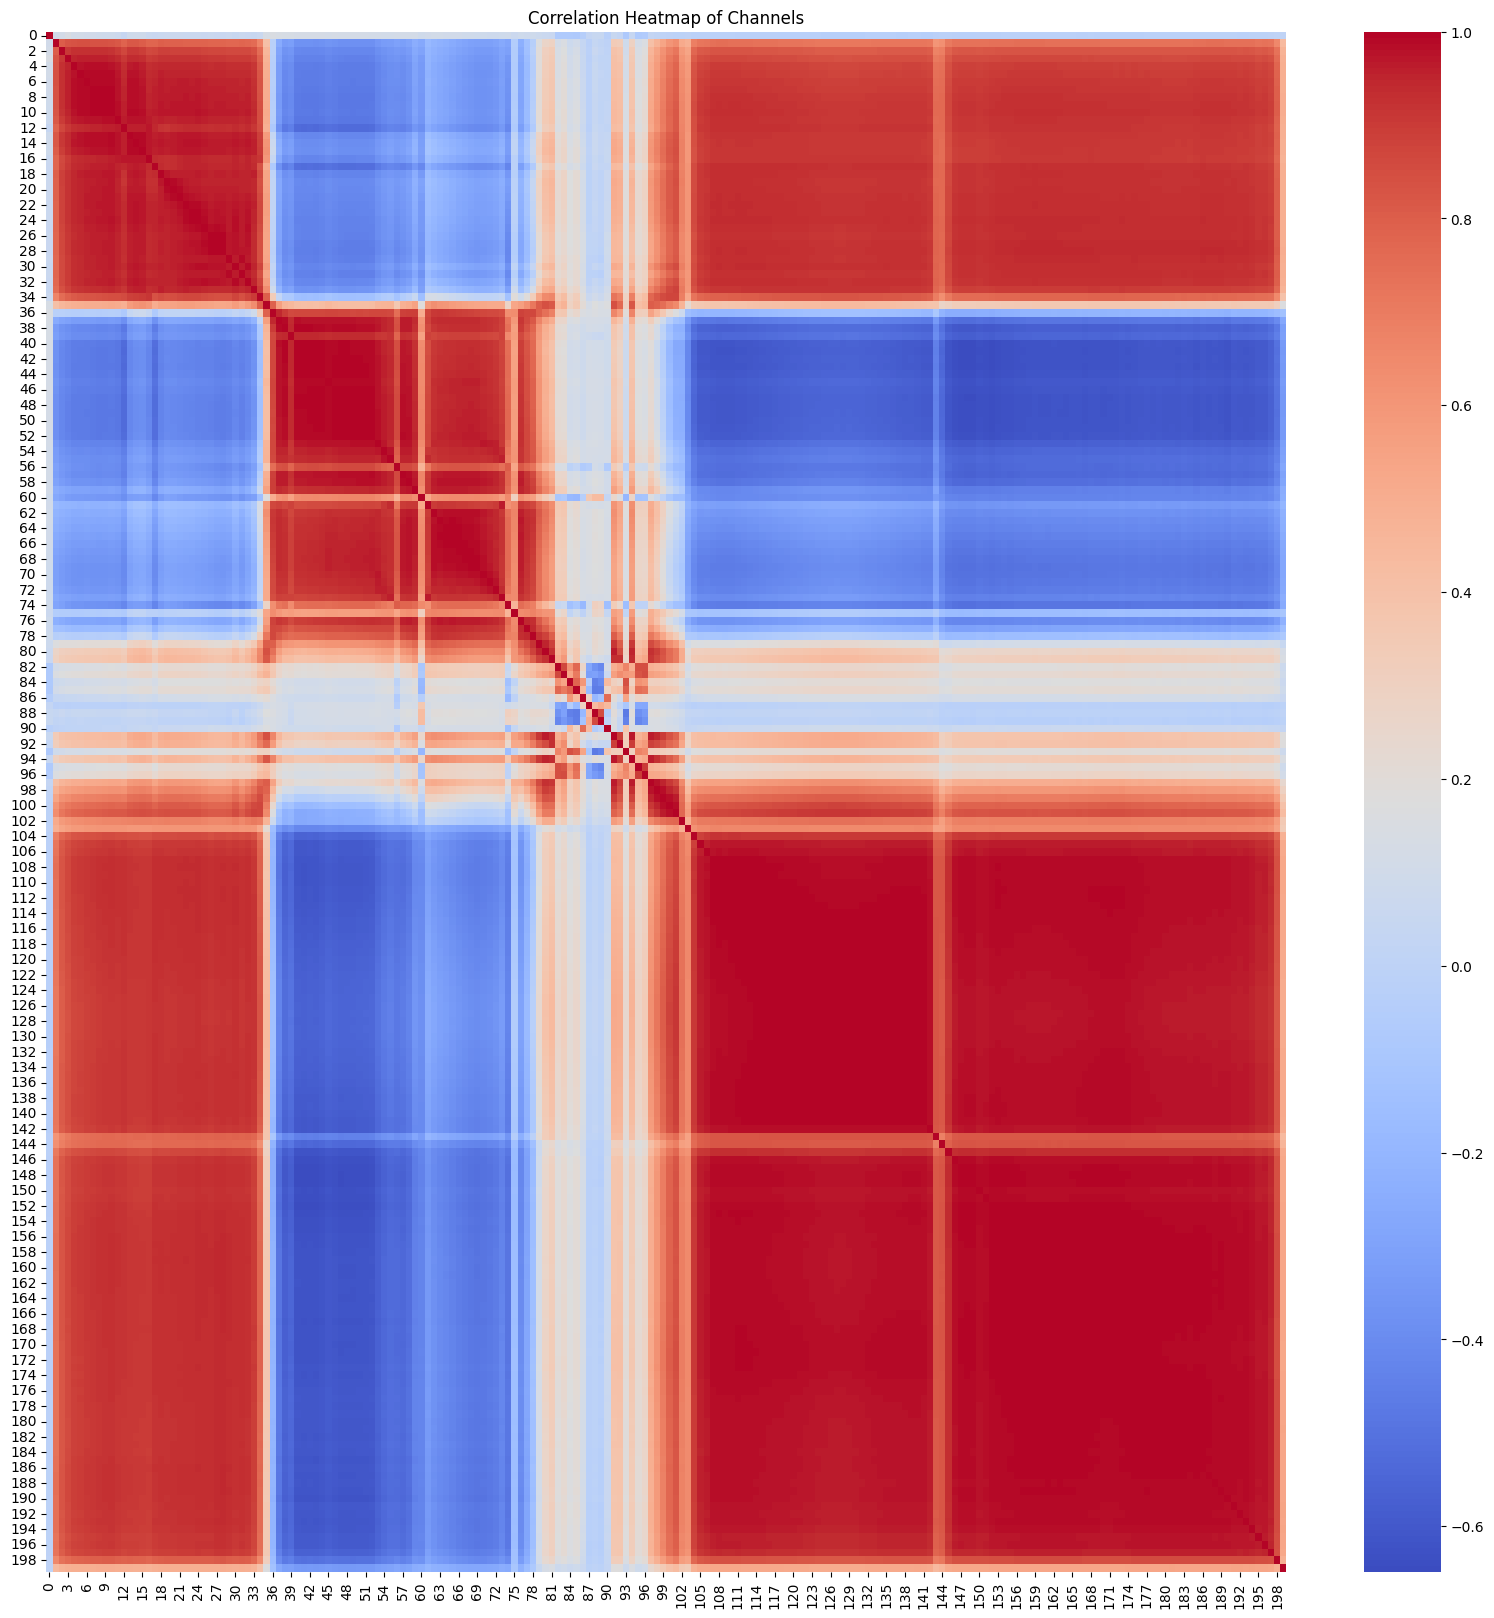

In [ ]:
#3.z
import seaborn as sns
channels = pd.DataFrame(hyper_spectral_valid)
fig, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(channels.corr(), cmap = "coolwarm")
plt.title('Correlation Heatmap of Channels')
plt.show()

In [ ]:
#4.a
n_clusters = 16

# KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clustered_image = kmeans.fit(hyper_spectral_valid)
cluster_labels = clustered_image.labels_


/home/george/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y, mapper


In [59]:
# Accuracy Score
translated_labels, mapper =  translate_predicted_labels(cluster_labels, labels_valid-1)
print("Accuracy Score:", accuracy_score(labels_valid-1, translated_labels))

# Rand Index
print("Rand Score:", rand_score(labels_valid-1, cluster_labels))


# Silhouette Score
print("Silhouette Score:", silhouette_score(hyper_spectral_valid, cluster_labels))

map: 0 --> 10
map: 1 --> 14
map: 2 --> 2
map: 3 --> 5
map: 4 --> 0
map: 5 --> 13
map: 6 --> 1
map: 7 --> 7
map: 8 --> 9
map: 9 --> 3
map: 10 --> 15
map: 11 --> 6
map: 12 --> 8
map: 13 --> 11
map: 14 --> 4
map: 15 --> 12
Accuracy Score: 0.3554493121280125
Rand Score: 0.851386121789152
Silhouette Score: 0.2821754627335447


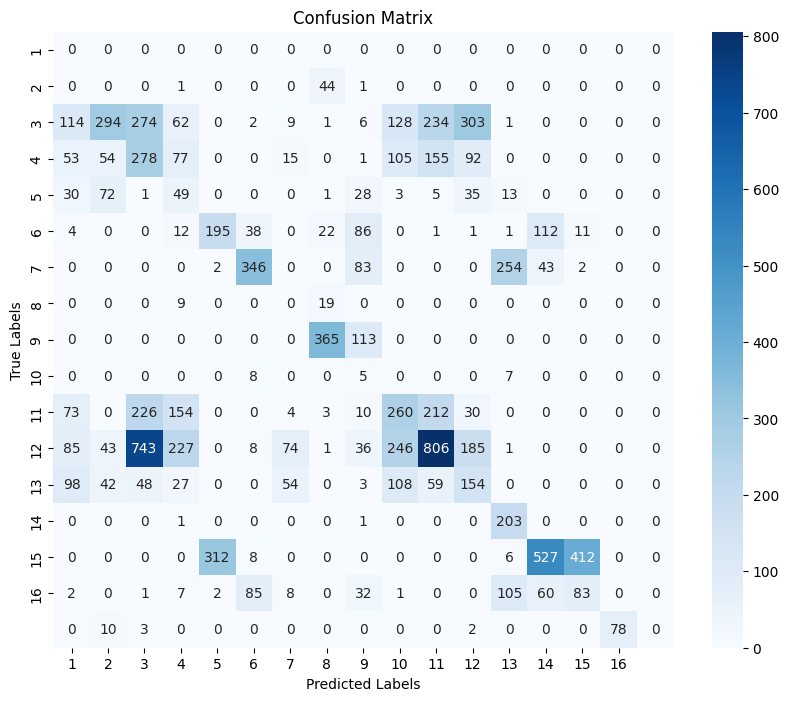

In [ ]:
#4.d

cm = confusion_matrix(labels_valid, translated_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(labels_valid), yticklabels=np.unique(labels_valid))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

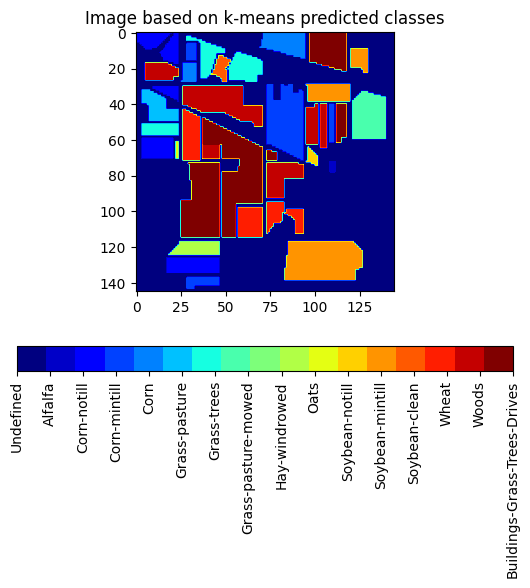

In [ ]:
#4.e
mapper_17classes = {key + 1:value  for key, value in mapper.items()}
mapper_17classes[0]=0

predicted_data = np.vectorize(lambda pixel: mapper_17classes[pixel])(labels)

fig, ax = plt.subplots()
colors = plt.cm.jet(np.linspace(0, 1, 17))

cax = ax.imshow(predicted_data, cmap=plt.cm.colors.ListedColormap(colors))
ax.set_title('Image based on k-means predicted classes')

cbar = fig.colorbar(cax, ticks=np.arange(0,17,1), orientation='horizontal')
cbar.ax.set_xticklabels(classes,rotation=90)

plt.show()

In [62]:
#5.a

pca = PCA(n_components=3)
reduced_data = pca.fit_transform(hyper_spectral_valid)

print('Shape before PCA:', hyper_spectral_valid.shape)
print('Shape after PCA:', reduced_data.shape)



Shape before PCA: (10249, 200)
Shape after PCA: (10249, 3)


In [63]:
#5.b
print("Variance ration per Component ", pca.explained_variance_ratio_)
result = 0
for i in range(3):
  result = result + pca.explained_variance_ratio_[i]
print("Συνολικό variance: ", result)

Variance ration per Component  [0.66452713 0.2654258  0.01206197]
Συνολικό variance:  0.942014895977166


In [64]:
#6a

#KMeans to the reduced-dimensional data
n_clusters = 16  # You mentioned using n_clusters=16
kmeans_new = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_reduced = kmeans_new.fit_predict(reduced_data)

#Accuracy Score
translated_labels_new, mapper2 = translate_predicted_labels(cluster_labels_reduced, labels_valid-1)
acc = accuracy_score(labels_valid- 1, translated_labels_new)
print("Accuracy Score:", acc)

#Rand Index
rand = rand_score(labels_valid -1, cluster_labels_reduced)
print("Rand Score:", rand)

#Silhouette Score
silhouette = silhouette_score(hyper_spectral_valid, cluster_labels_reduced)
print("Silhouette Score:", silhouette)


/home/george/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 2
map: 1 --> 13
map: 2 --> 12
map: 3 --> 10
map: 4 --> 4
map: 5 --> 8
map: 6 --> 3
map: 7 --> 0
map: 8 --> 9
map: 9 --> 15
map: 10 --> 11
map: 11 --> 14
map: 12 --> 6
map: 13 --> 1
map: 14 --> 7
map: 15 --> 5
Accuracy Score: 0.3450092691969948
Rand Score: 0.85068707603773
Silhouette Score: 0.271706248868553


6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

In [ ]:
#6.b

accuracy_scores = []
rand_scores = []
silhouette_scores = []

# Experiment with different values of n_components
for n_components in range(1, 11):
    # PCA
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(hyper_spectral_valid)

    # KMeans
    kmeans = KMeans(n_clusters=16, random_state=42)
    predicted_clustered_image = kmeans.fit(data_pca)
    predicted_labels = predicted_clustered_image.labels_

    # Translate predicted labels if true labels are available
    translated_labels, mapper3 = translate_predicted_labels(predicted_labels, labels_valid-1)

    # scores
    accuracy = accuracy_score(labels_valid-1, translated_labels)
    rand = rand_score(labels_valid-1, translated_labels)
    silhouette = silhouette_score(hyper_spectral_valid, translated_labels)

    accuracy_scores.append(accuracy)
    rand_scores.append(rand)
    silhouette_scores.append(silhouette)



/home/george/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 12
map: 2 --> 8
map: 3 --> 6
map: 4 --> 1
map: 5 --> 11
map: 6 --> 7
map: 7 --> 14
map: 8 --> 15
map: 9 --> 5
map: 10 --> 9
map: 11 --> 4
map: 12 --> 13
map: 13 --> 3
map: 14 --> 0
map: 15 --> 2


/home/george/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 1
map: 1 --> 7
map: 2 --> 13
map: 3 --> 10
map: 4 --> 11
map: 5 --> 5
map: 6 --> 6
map: 7 --> 2
map: 8 --> 4
map: 9 --> 3
map: 10 --> 12
map: 11 --> 15
map: 12 --> 8
map: 13 --> 9
map: 14 --> 14
map: 15 --> 0


/home/george/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 2
map: 1 --> 13
map: 2 --> 12
map: 3 --> 10
map: 4 --> 4
map: 5 --> 8
map: 6 --> 3
map: 7 --> 0
map: 8 --> 9
map: 9 --> 15
map: 10 --> 11
map: 11 --> 14
map: 12 --> 6
map: 13 --> 1
map: 14 --> 7
map: 15 --> 5


/home/george/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 5
map: 2 --> 9
map: 3 --> 4
map: 4 --> 7
map: 5 --> 0
map: 6 --> 3
map: 7 --> 14
map: 8 --> 1
map: 9 --> 6
map: 10 --> 10
map: 11 --> 8
map: 12 --> 12
map: 13 --> 15
map: 14 --> 13
map: 15 --> 2


/home/george/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 13
map: 2 --> 12
map: 3 --> 5
map: 4 --> 3
map: 5 --> 1
map: 6 --> 4
map: 7 --> 6
map: 8 --> 9
map: 9 --> 0
map: 10 --> 7
map: 11 --> 8
map: 12 --> 10
map: 13 --> 14
map: 14 --> 15
map: 15 --> 2


/home/george/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 5
map: 1 --> 10
map: 2 --> 4
map: 3 --> 13
map: 4 --> 9
map: 5 --> 2
map: 6 --> 11
map: 7 --> 7
map: 8 --> 14
map: 9 --> 12
map: 10 --> 6
map: 11 --> 0
map: 12 --> 1
map: 13 --> 15
map: 14 --> 3
map: 15 --> 8


/home/george/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 0
map: 1 --> 9
map: 2 --> 14
map: 3 --> 11
map: 4 --> 5
map: 5 --> 2
map: 6 --> 4
map: 7 --> 10
map: 8 --> 7
map: 9 --> 12
map: 10 --> 6
map: 11 --> 3
map: 12 --> 1
map: 13 --> 15
map: 14 --> 13
map: 15 --> 8


/home/george/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 5
map: 2 --> 4
map: 3 --> 0
map: 4 --> 9
map: 5 --> 1
map: 6 --> 6
map: 7 --> 2
map: 8 --> 14
map: 9 --> 11
map: 10 --> 12
map: 11 --> 8
map: 12 --> 3
map: 13 --> 7
map: 14 --> 15
map: 15 --> 13


/home/george/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 13
map: 1 --> 3
map: 2 --> 6
map: 3 --> 1
map: 4 --> 11
map: 5 --> 9
map: 6 --> 12
map: 7 --> 5
map: 8 --> 10
map: 9 --> 8
map: 10 --> 7
map: 11 --> 2
map: 12 --> 14
map: 13 --> 4
map: 14 --> 0
map: 15 --> 15


/home/george/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 5
map: 2 --> 3
map: 3 --> 0
map: 4 --> 1
map: 5 --> 12
map: 6 --> 6
map: 7 --> 9
map: 8 --> 4
map: 9 --> 7
map: 10 --> 15
map: 11 --> 8
map: 12 --> 2
map: 13 --> 10
map: 14 --> 14
map: 15 --> 13


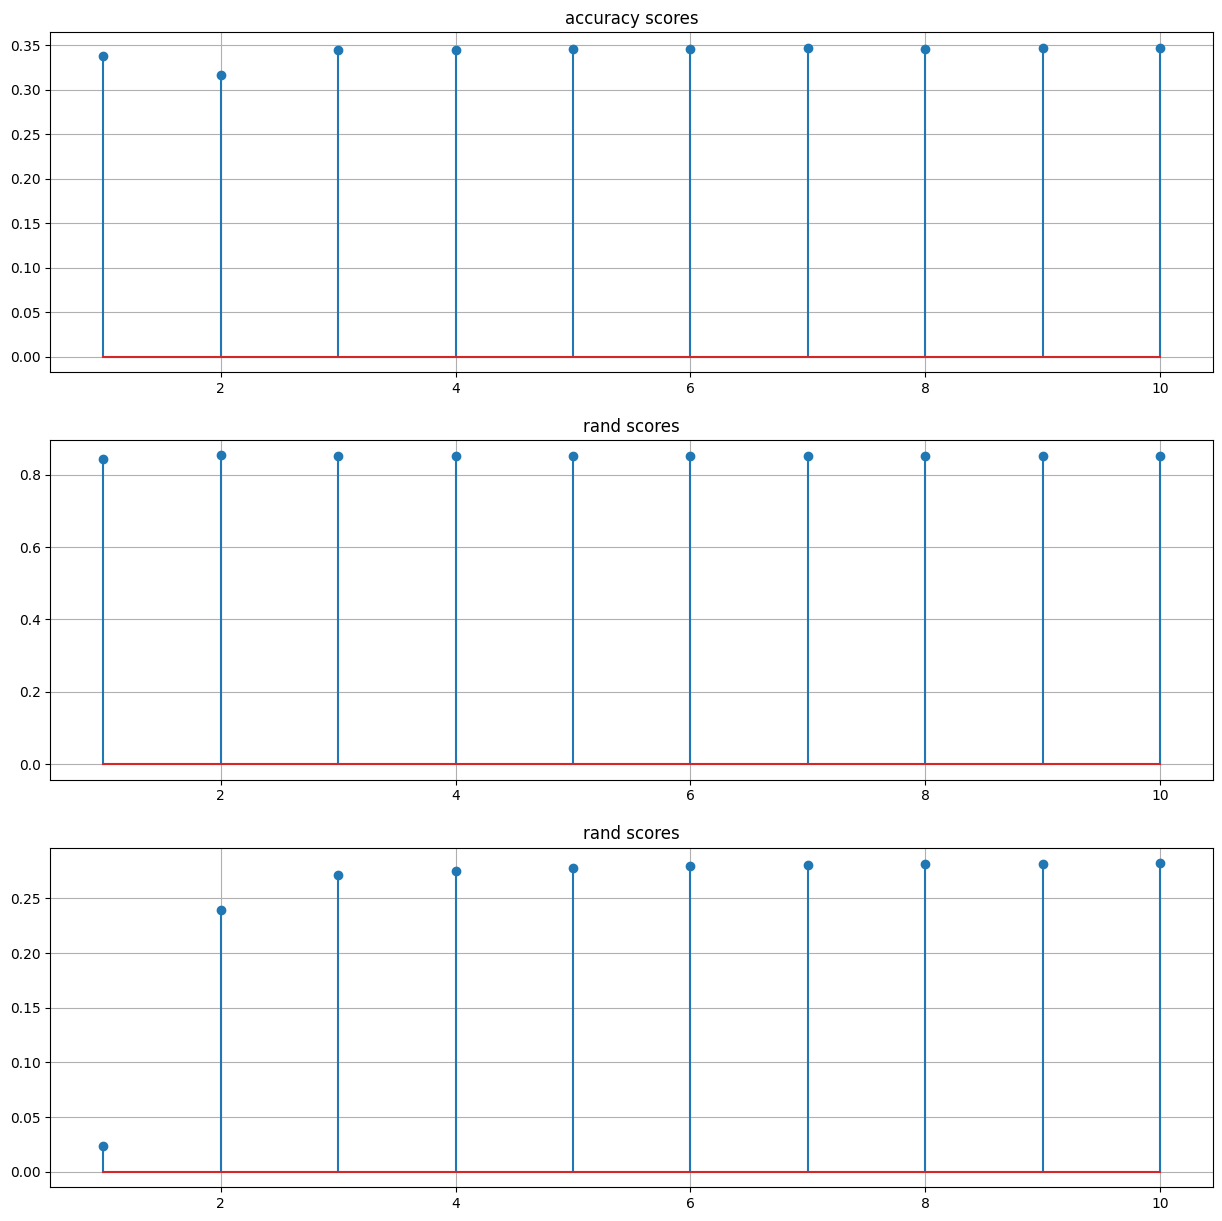

In [66]:
# Number of components
components_range = list(range(1, 11))

fig, axs = plt.subplots(3,figsize=(15, 15))
axs[0].stem(components_range, accuracy_scores)
axs[0].set_title('accuracy scores')
axs[0].grid()
axs[1].stem(components_range, rand_scores)
axs[1].set_title('rand scores')
axs[1].grid()
axs[2].stem(components_range, silhouette_scores)
axs[2].set_title('rand scores')
axs[2].grid()

plt.show()